# Import and Clean Data

Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

Read in data

In [2]:
movies = pd.read_csv('movies.csv')
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


Look for missing data

In [3]:
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 15 columns):
name        5421 non-null object
rating      5421 non-null object
genre       5421 non-null object
year        5421 non-null int64
released    5421 non-null object
score       5421 non-null float64
votes       5421 non-null int64
director    5421 non-null object
writer      5421 non-null object
star        5421 non-null object
country     5421 non-null object
budget      5421 non-null int64
gross       5421 non-null int64
company     5421 non-null object
runtime     5421 non-null int64
dtypes: float64(1), int64(5), object(9)
memory usage: 635.4+ KB


Check data types for columns

In [5]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

Change data type of columns

In [6]:
movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

Order by gross revenue

In [7]:
movies.sort_values(by='gross', inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
5302,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
5158,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
1378,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
2286,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
154,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


Drop duplicates

In [8]:
movies.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
5417,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
5418,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
5419,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


# Look Correlations with gross

Scatter plot of budget vs gross

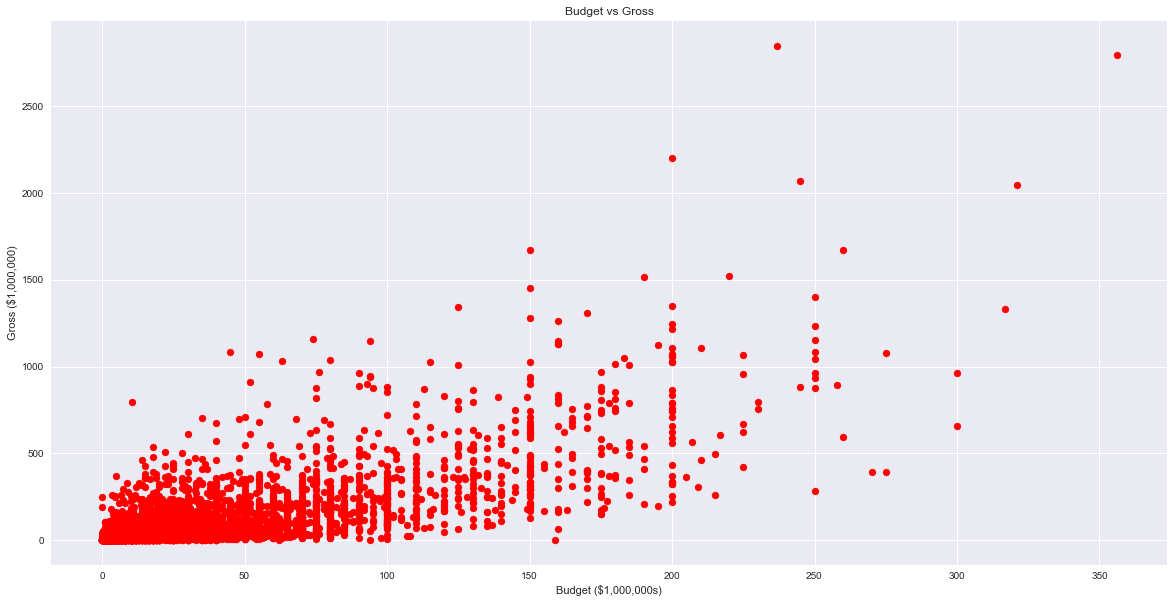

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(x=movies['budget']/1000000, y=movies['gross']/1000000, color='red')
plt.title('Budget vs Gross')
plt.xlabel('Budget ($1,000,000s)')
plt.ylabel('Gross ($1,000,000)')
plt.show()

Plot budget vs gross in seaborn

Text(0, 0.5, 'Gross ($1,000,000)')

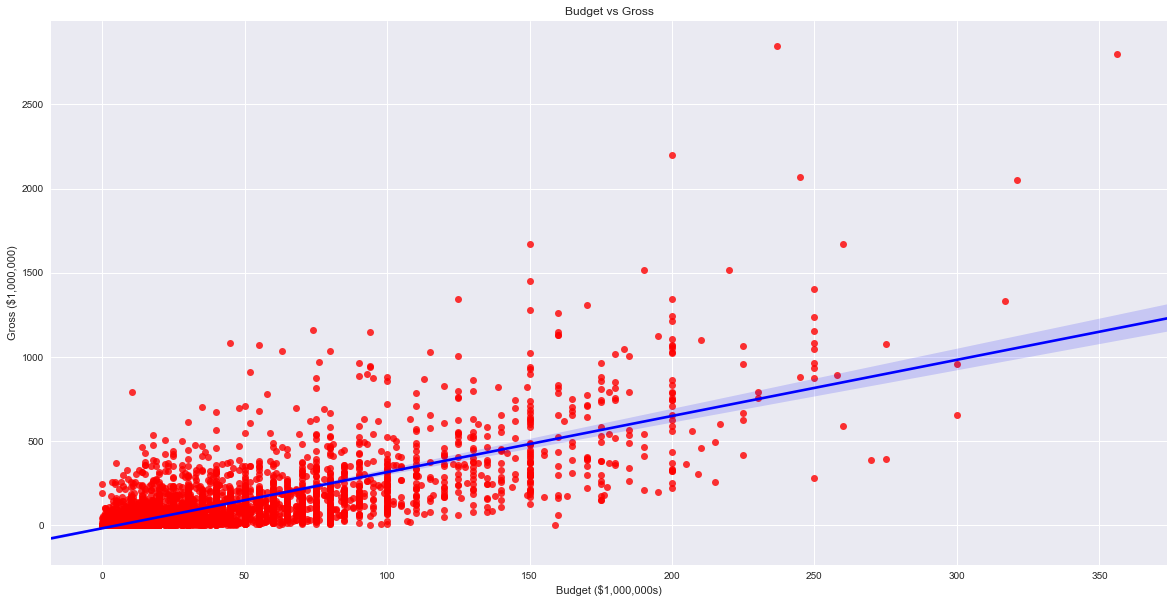

In [10]:
plt.figure(figsize=(20,10))
sns.regplot(x=movies['budget']/1000000, y=movies['gross']/1000000, data=movies, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('Budget vs Gross')
plt.xlabel('Budget ($1,000,000s)')
plt.ylabel('Gross ($1,000,000)')

Checking Numeric Field Correlations

In [11]:
movies.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


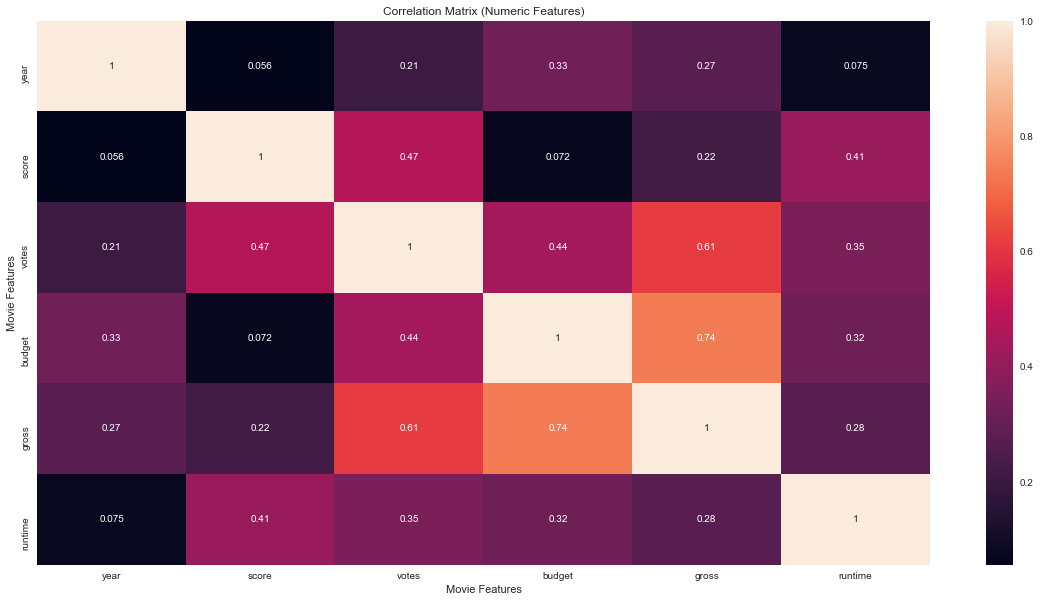

In [12]:
plt.figure(figsize=(20,10))
corr_matrix = movies.corr()
ax = sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix (Numeric Features)')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Look at Company

In [13]:
movies_categorized = movies
movies_categorized.drop(['released'], axis=1, inplace=True)
for col in movies_categorized.columns:
    if(movies_categorized[col].dtype == 'object'):
        movies_categorized[col] = movies_categorized[col].astype('category')
        movies_categorized[col] = movies_categorized[col].cat.codes
movies_categorized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,5.8,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,7.3,108000,719,351,271,47,6000000,39846344,1083,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,415,6,0,2020,6.6,140000,16,2390,1812,47,90000000,426505244,452,124
5417,3556,4,0,2020,6.5,102000,852,2309,147,47,85000000,319715683,1108,99
5418,1153,4,1,2020,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101
5419,3978,4,1,2020,6.8,42000,294,2091,640,6,135000000,111105497,12,100


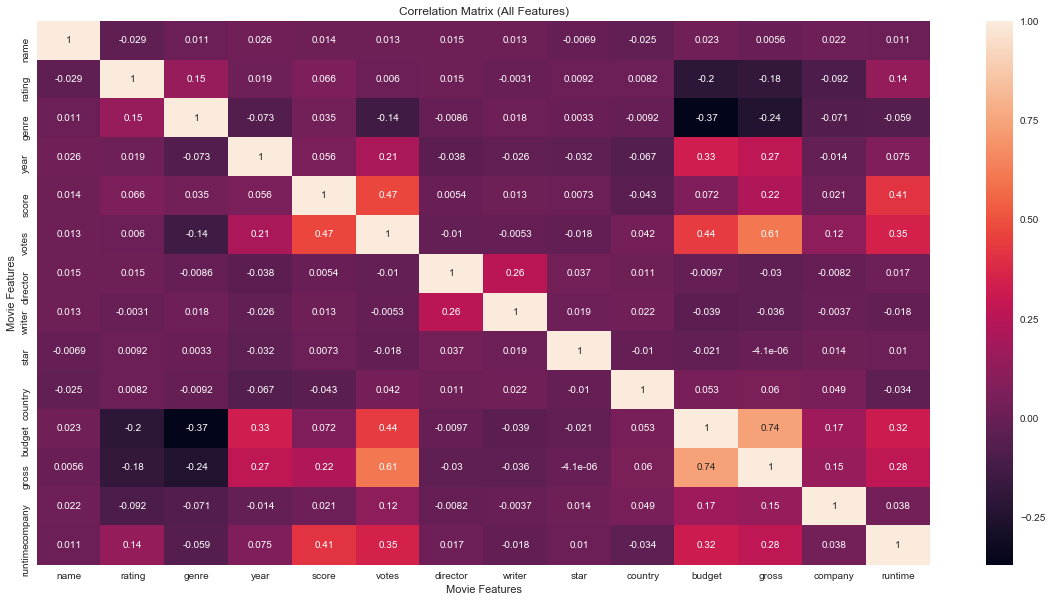

In [14]:
plt.figure(figsize=(20,10))
corr_matrix = movies_categorized.corr()
ax = sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix (All Features)')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [15]:
movies_categorized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
score,0.014450,0.065983,0.035106,0.056386,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108
country,-0.025490,0.008230,-0.009164,-0.066748,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477


In [16]:
corr_matrix = movies_categorized.corr()

corr_pairs = corr_matrix.unstack()
corr_pairs

name     name       1.000000
         rating    -0.029234
         genre      0.010996
         year       0.025542
         score      0.014450
                      ...   
runtime  country   -0.034477
         budget     0.318695
         gross      0.275796
         company    0.037585
         runtime    1.000000
Length: 196, dtype: float64

In [17]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.368523
budget   genre     -0.368523
gross    genre     -0.244101
genre    gross     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 196, dtype: float64

In [18]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
high_corr

gross   votes     0.614751
votes   gross     0.614751
budget  gross     0.740247
gross   budget    0.740247
dtype: float64

Votes and budget have the highest correlation to gross